In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('housepredictiontrain.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
## Missing valuespercentage
#df.isnull() ## to ceheck if there's any missing values
#df.isnull().sum()  ###  to know about the number of missing values in each column
# df.isnull().sum().sum()   ### to know the total number pf missing values in the whole data
null_var =(df.isnull().sum()/df.shape[0] )*100  ## to know the percentage of missing values 
#(df.isnull().sum()/len(df))*100  ### alternative to  know the percentage of missing values
##len(df)
## df.shape[0]


In [5]:
### Remove the missing values
drop_columns = null_var[null_var >20].keys()

drop_columns

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
 # dropping the columns  that has more than 20% of null values 
df_drop_columns=df.drop(columns=drop_columns)

In [7]:
df_drop_columns.shape

(1460, 75)

<Axes: >

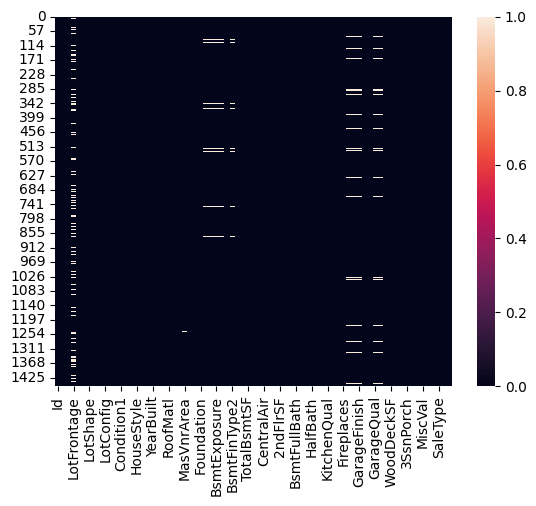

In [8]:
#figurimg put the null values in heatmap

sns.heatmap(df_drop_columns.isnull())

In [9]:
df_drop_rows = df_drop_columns.dropna()
# dropna() drops rows by default but if we wish to drop columns we can simply assign dropna(axis = 1)

In [10]:
df_drop_rows.shape

(1094, 75)

<Axes: >

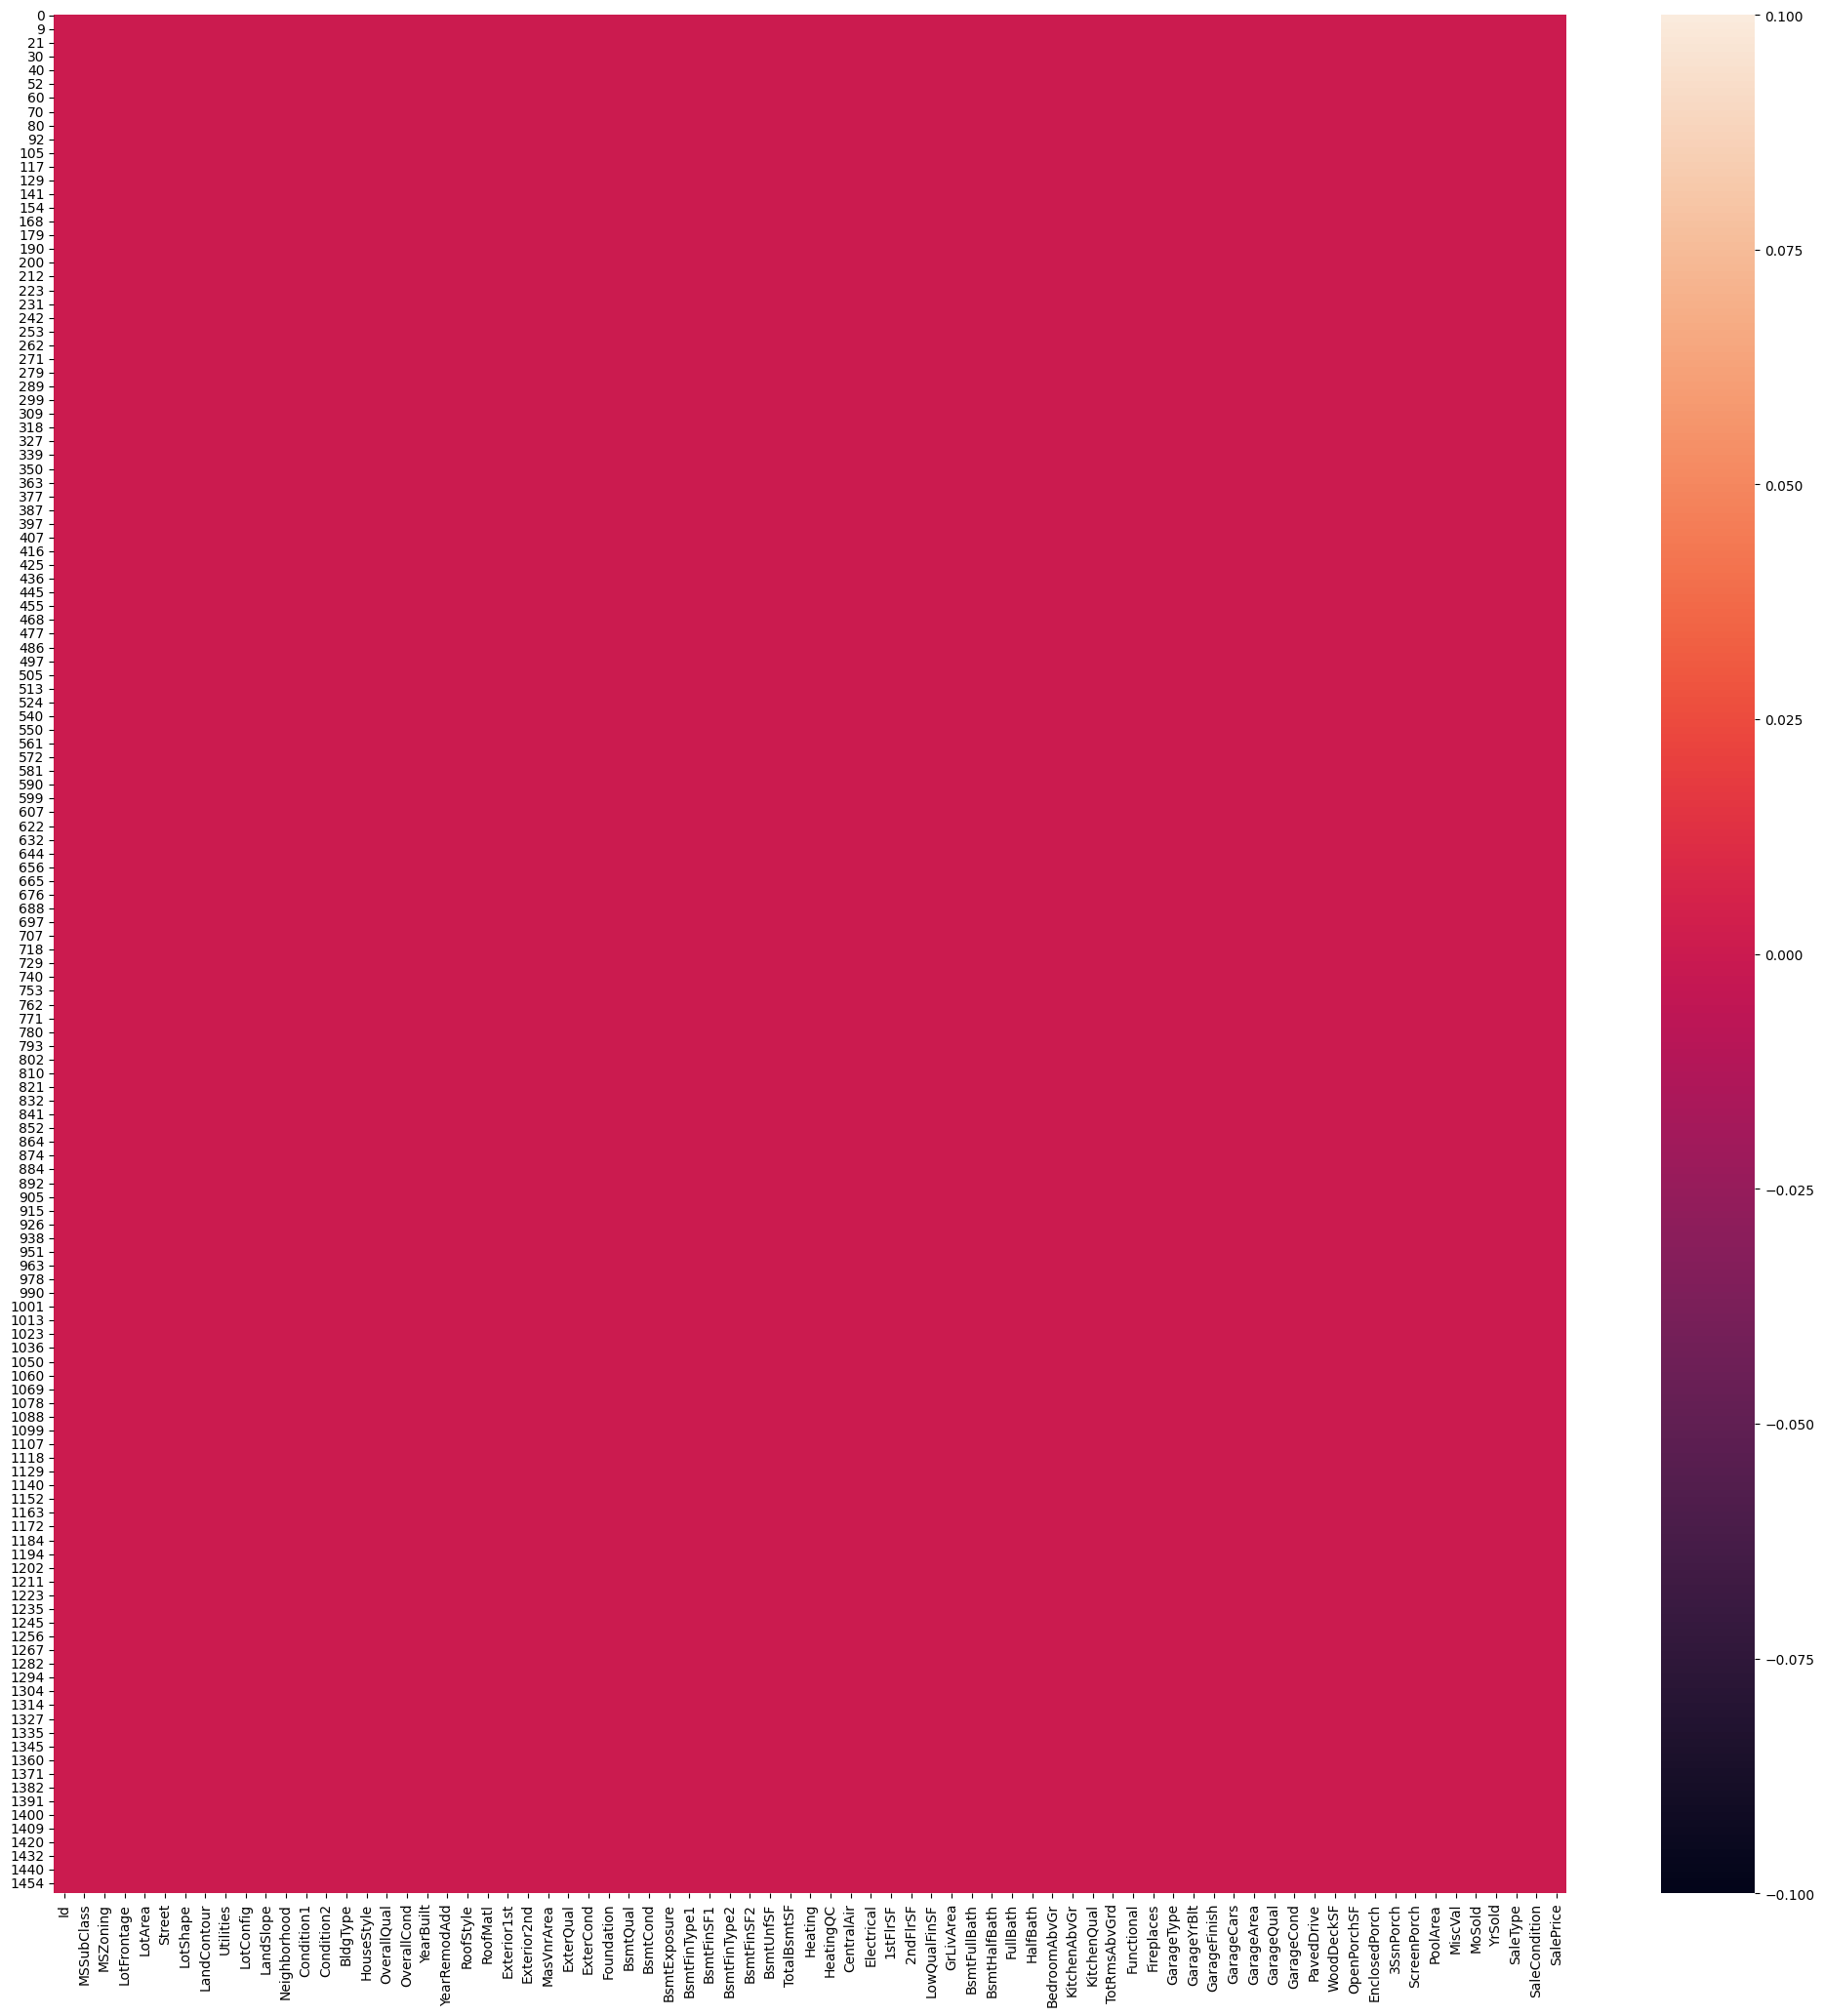

In [11]:
plt.figure(figsize =(25,25))
sns.heatmap(df_drop_rows.isnull())

#### observation ::: No missing values 

In [12]:
df_drop_rows.isnull().sum().sum()

0

In [13]:

#Selecting the numerical variables only
df_drop_columns.select_dtypes(include =['int64', 'float64']).keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\2078991092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MSSubClass'])


<Axes: xlabel='MSSubClass', ylabel='Density'>

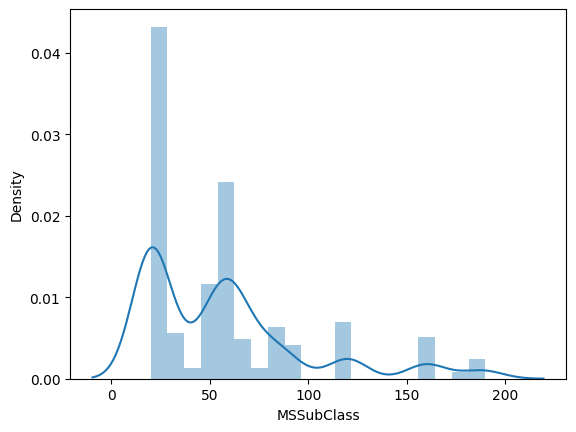

In [14]:
sns.distplot(df['MSSubClass'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\4106767387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drop_rows['MSSubClass'])


<Axes: xlabel='MSSubClass', ylabel='Density'>

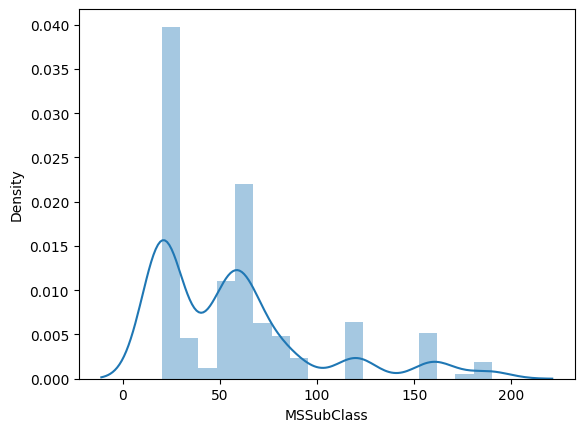

In [15]:
sns.distplot(df_drop_rows['MSSubClass'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\1957257685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MSSubClass'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\1957257685.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drop_rows['MSSubClass'])


<Axes: xlabel='MSSubClass', ylabel='Density'>

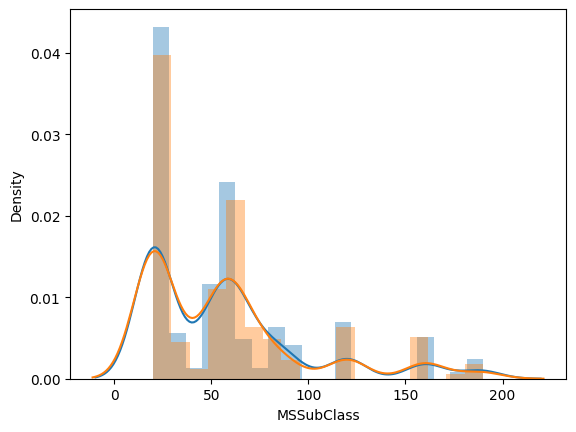

In [16]:
# overlap the original and the (no missing values dataset)
sns.distplot(df['MSSubClass'])
sns.distplot(df_drop_rows['MSSubClass']) 

C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\3604401671.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins = 20)
C:\Users\Acer\AppData\Local\Temp\ipykernel_16080\3604401671.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drop_rows[var], bins =20)
C:\Users\Acer\AppData

ValueError: num must be an integer with 1 <= num <= 36, not 37

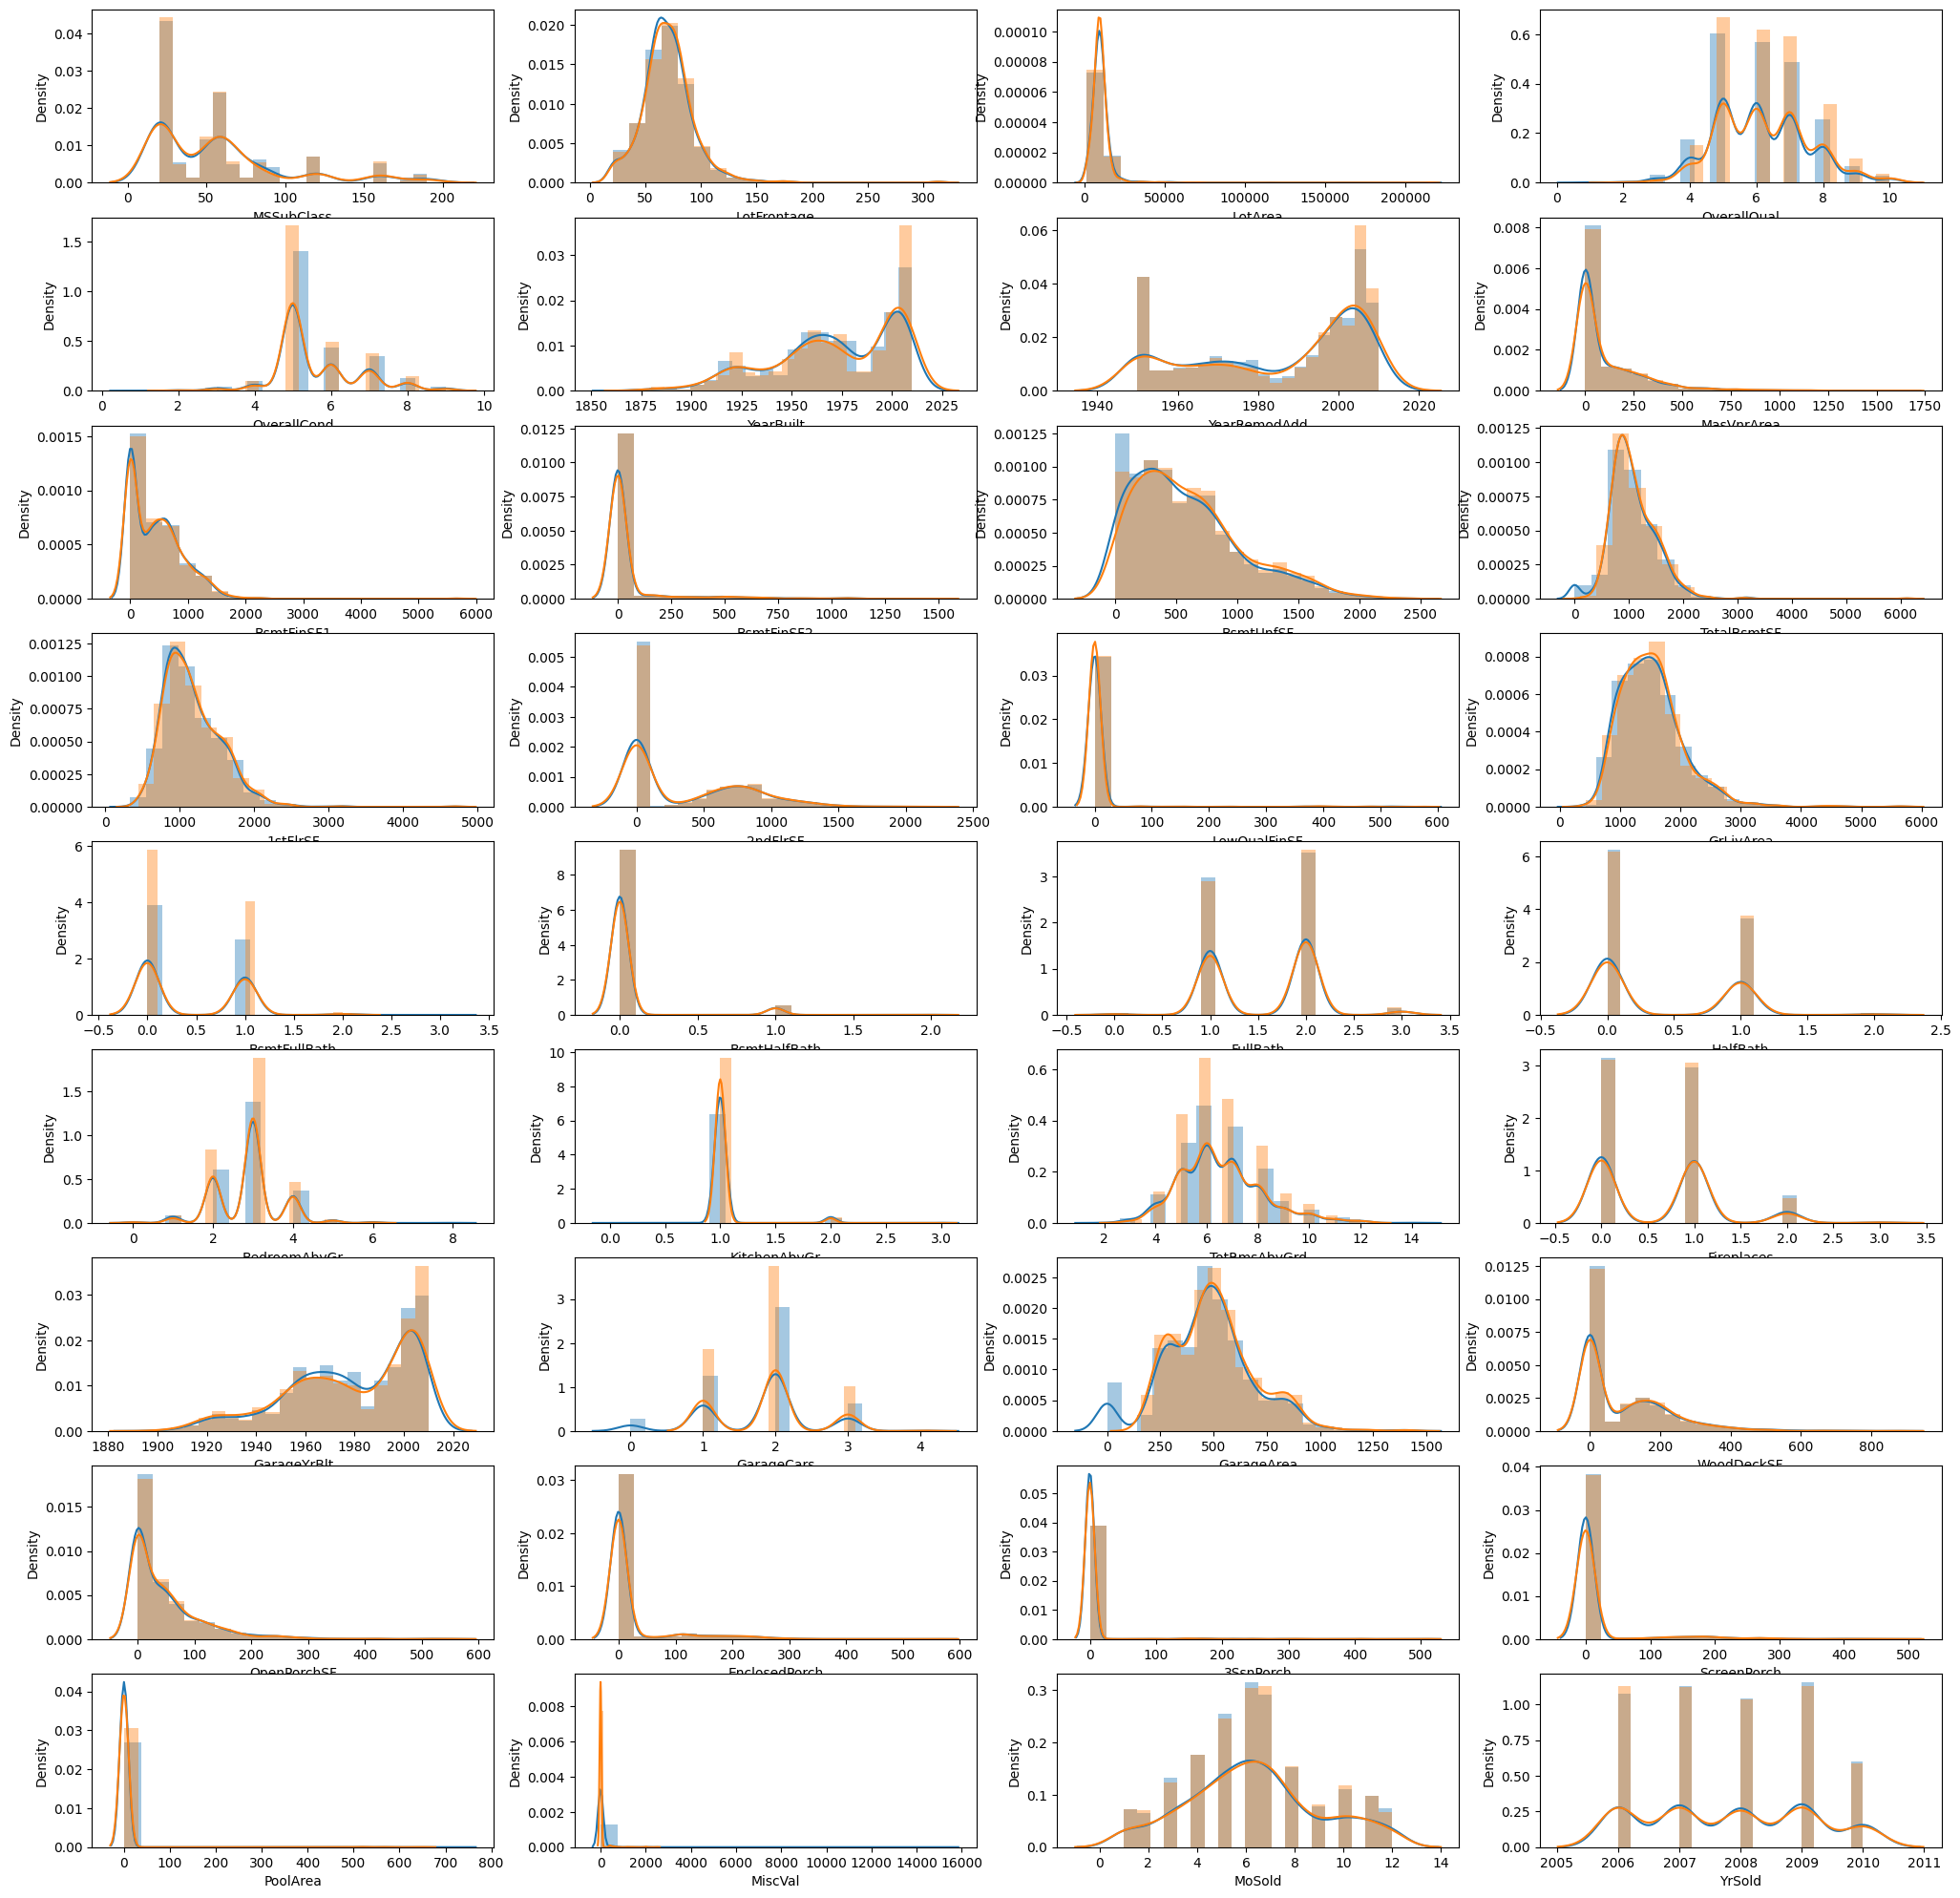

In [17]:
num_var = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

plt.figure(figsize=(25,25))
for i,var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var], bins = 20)
    sns.distplot(df_drop_rows[var], bins =20) 

In [ ]:

#Selecting the categorical variables only
df_drop_rows.select_dtypes(include =['object']).keys()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,df_drop_rows['MSZoning'].value_counts()/df_drop_rows.shape[0]*100],axis=1,keys=['MSZoning_org', 'MSZoning_clean'])

,MSZoning_org,MSZoning_clean
MSZoning,,
RL,78.835616,77.696527
RM,14.931507,15.813528
FV,4.452055,4.936015
RH,1.095890,0.822669
C (all),0.684932,0.731261


In [ ]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0]*100,
            df_drop_rows[var].value_counts()/df_drop_rows.shape[0]*100],axis=1,keys=[var +'org', var+'clean'])

In [ ]:
cat_var_dist('MSZoning')

,MSZoningorg,MSZoningclean
MSZoning,,
RL,78.835616,77.696527
RM,14.931507,15.813528
FV,4.452055,4.936015
RH,1.095890,0.822669
C (all),0.684932,0.731261


ValueError: could not convert string to float: 'WD'

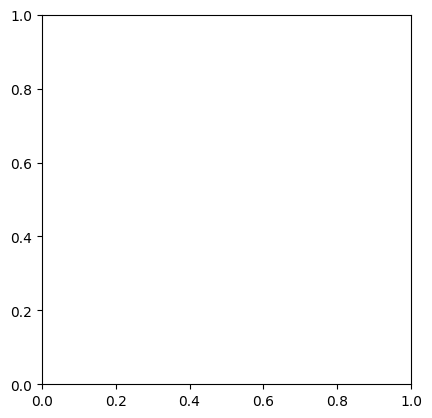

In [19]:
cat_var = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
plt.pie('SaleType', labels = 'CentralAir', data = df)
